<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Pisarev Ivan, ODS Slack: pisarev_i
    
## <center> Tutorial
## <center> Customizing some details in Matplotlib

### Intro

Using the Matplotlib library for visualization is great because you can customize nothing if you don't need it, and everything works fine out of the box.  
Another great thing is you can customize almost any part of the plot as you wish, the tuning options are very wide.  
  
A good source of information about the possibilities of Matplotlib is a <a href="https://matplotlib.org/gallery/index.html" target=__blank>Gallery</a> and <a href="https://matplotlib.org/tutorials/index.html" target=__blank>tutorials</a> on the project website. In the gallery you can find an example for any need, it is enough to imagine what and how you want to visualize - and you will find the implementation of your imagination in the gallery.  
In this tutorial, we will not retell the <a href="https://matplotlib.org/users/index.html" target=__blank>User's Guide</a>.  
We just will create some plots and make corrections to them to better convey the idea.

### Backend and style

In [1]:
import numpy as np
import pandas as pd

import matplotlib

Backend specify different output formats, and there are two types of backends: user interface (interactive) backends and hardcopy (non-interactive) backends to make image files. You can see available backends:
```python
matplotlib.rcsetup.interactive_bk
matplotlib.rcsetup.non_interactive_bk
```

If you want to get more interactive capabilities with your plots (such as zoom in, zoom out etc.) you can choose an appropriate backend
```python
matplotlib.use('nbagg')
```
before you call
```python
import matplotlib.pyplot as plt
```
We will not do that.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

What you really need is to choose a style. In Appendix 1 you can see the available styles.  
The style defines many parameters of the chart, so if you can not live without a grid and with a gray background - first of all set your favorite style.  
I will:

In [3]:
plt.rcdefaults()
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8,4)

Let's get <a href="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2" target=__blank>Olympic dataset</a>.

In [4]:
dfAthlete = pd.read_csv('../../data/athlete_events.csv')
dfNOC = pd.read_csv('../../data/noc_regions.csv')

dfNOC.columns = ['NOC', 'NOC_Region', 'NOC_Notes']
dfAthlete = pd.merge(left=dfAthlete, right=dfNOC, left_on='NOC', right_on='NOC', how='left')
dfAthlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,NOC_Region,NOC_Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Our first idea would be to demonstrate the growth of some values over the years.

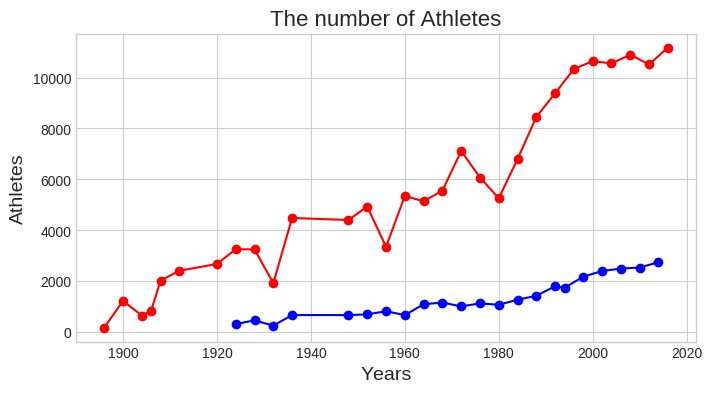

In [5]:
plt.plot(dfAthlete[dfAthlete['Season']=='Summer'].groupby('Year')['ID'].nunique(), 'ro-');
plt.plot(dfAthlete[dfAthlete['Season']=='Winter'].groupby('Year')['ID'].nunique(), 'bo-');
plt.xlabel('Years', fontsize=14);
plt.ylabel('Athletes', fontsize=14);
plt.title('The number of Athletes', fontsize=16);

The total number of athletes taking part in the games is growing over time, obviously.  
Autoscaling has done well, but we want better. Let's consider, what we can do with a grid.

### Ticks and grid

Now we need to briefly describe the relationship between `Figure`, `Axes`, `Subplots` and `pyplot`. 
  -  The Figure is the top-level container. Figure can contain multiple Axes
  -  The Axes is the area that we plot data on
  -  Subplot places Axes on a regular grid
  -  When we call most `pylot` functions, pyplot calls Axes method on Axes is "current"  

We purposely used `pylot` functions above, because it is faster and easier.  
But further we instead of this record:
```python
plt.plot(...)
plt.title(...)
```
will use this record:
```python
fig, ax = plt.subplots()
ax.plot(...)
ax.set_title(...)
```
Yes, it's longer, but it's more explicit and this variant we can use in multiple axes with subplots.  

Ok, we want to turn on minor lines for XAxis and show it every 4 years.  
We can do it something like this:
```python
ax.xaxis.set_ticks(np.arange(minYear, maxYear, 4), minor=True) # set minor ticks location
ax.grid(True, which='minor', linestyle='dotted') # turn minor ticks lines on
```

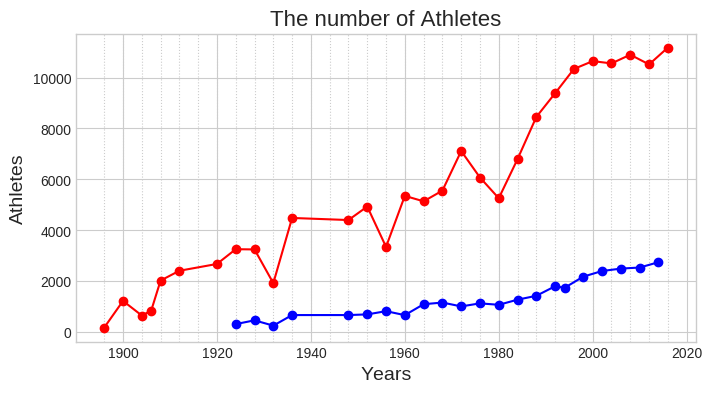

In [6]:
fig, ax = plt.subplots()
ax.plot(dfAthlete[dfAthlete['Season']=='Summer'].groupby('Year')['ID'].nunique(), 'ro-');
ax.plot(dfAthlete[dfAthlete['Season']=='Winter'].groupby('Year')['ID'].nunique(), 'bo-');
ax.xaxis.set_ticks(np.arange(1896, 2020, 4), minor=True)
ax.grid(True, which='minor', linestyle='dotted')
ax.set_xlabel('Years', fontsize=14);
ax.set_ylabel('Athletes', fontsize=14);
ax.set_title('The number of Athletes', fontsize=16);

But there is a better way for location ticks.  
We can use function `MultipleLocator`, it is just what we need in this case.
Do not invent your own ways to location ticks until you have looked into `matplotlib.ticker`. There is many useful locator for any cases (but for datetime you can use lacators from `matplotlib.dates`).  
So, let's
  -  Use `MultipleLocator` for minor (ticks every 4 years) and major (every 24 years) ticks.  
  -  For YAxis ticks we will use `MaxNLocator` (no more than 3 ticks).  
  -  Also, we add a legend, increase linewidth, marker and label size, add 5% "padding" to a plot in the y-direction.

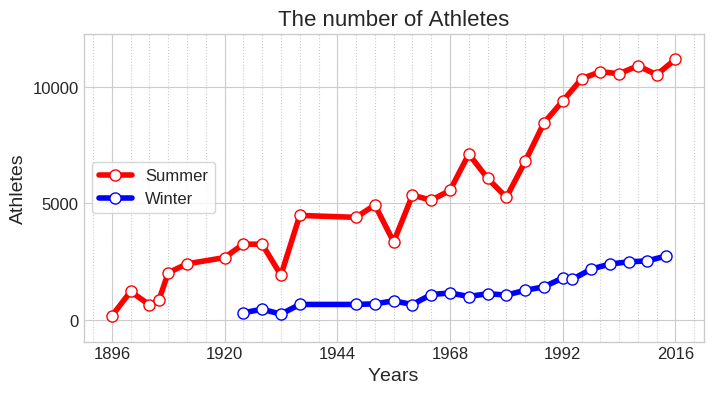

In [7]:
from matplotlib.ticker import MultipleLocator, MaxNLocator

fig, ax = plt.subplots()
ax.plot(dfAthlete[dfAthlete['Season']=='Summer'].groupby('Year')['ID'].nunique(),
        color='r', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='r',
        label='Summer');
ax.plot(dfAthlete[dfAthlete['Season']=='Winter'].groupby('Year')['ID'].nunique(),
        color='b', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='b',
        label='Winter');
ax.xaxis.set_major_locator(MultipleLocator(24)) # Major ticks every 24 years
ax.xaxis.set_minor_locator(MultipleLocator(4)) # Minor ticks every 4 years
ax.yaxis.set_major_locator(MaxNLocator(3)) # Major ticks, maximum 3 lines
ax.grid(True, which='minor', linestyle='dotted') # Minor lines dotted
ax.margins(x=0.05, y=0.1) # padding
ax.tick_params(labelsize=12)
ax.legend(loc='center left', frameon=True, fontsize=12) #legend with frame
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Athletes', fontsize=14)
ax.set_title('The number of Athletes', fontsize=16)
plt.show();

### Sublots

Now we can add the same plot for the number of Events, and gather them together.  
We want to use one XAxis for both plots so we will use
```python
plt.subplots(nrows=2, ncols=1, sharex=True)
```

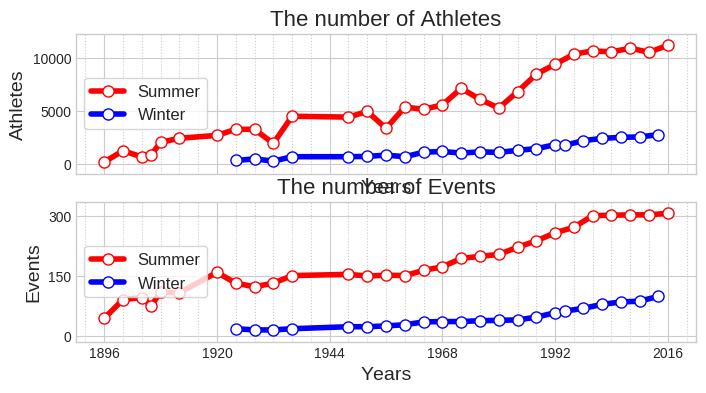

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
axes[0].plot(dfAthlete[dfAthlete['Season']=='Summer'].groupby('Year')['ID'].nunique(),
        color='r', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='r',
        label='Summer');
axes[0].plot(dfAthlete[dfAthlete['Season']=='Winter'].groupby('Year')['ID'].nunique(),
        color='b', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='b',
        label='Winter');
axes[0].grid(True, which='minor', linestyle='dotted')
axes[0].yaxis.set_major_locator(MaxNLocator(3))
axes[0].margins(x=0.05, y=0.1)
axes[0].legend(loc='center left', frameon=True, fontsize=12);
axes[0].set_xlabel('Years', fontsize=14);
axes[0].set_ylabel('Athletes', fontsize=14);
axes[0].set_title('The number of Athletes', fontsize=16);

axes[1].plot(dfAthlete[dfAthlete['Season']=='Summer'].groupby('Year')['Event'].nunique(),
        color='r', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='r',
        label='Summer');
axes[1].plot(dfAthlete[dfAthlete['Season']=='Winter'].groupby('Year')['Event'].nunique(),
        color='b', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='b',
        label='Winter');

axes[1].xaxis.set_major_locator(MultipleLocator(24))
axes[1].xaxis.set_minor_locator(MultipleLocator(4))
axes[1].yaxis.set_major_locator(MaxNLocator(3))
axes[1].grid(True, which='minor', linestyle='dotted')
axes[1].margins(x=0.05, y=0.1)
axes[1].legend(loc='center left', frameon=True, fontsize=12);
axes[1].set_xlabel('Years', fontsize=14);
axes[1].set_ylabel('Events', fontsize=14);
axes[1].set_title('The number of Events', fontsize=16);

plt.show();

Oh, something wrong with labels and titles.  
In this case, possible solutions are:  
  -  If you want matplotlib automatically adjusts subplot params so that the subplots fit into the figure area, you can use `fig.tight_layout()`.
  -  You can increase space between subplots by `fig.subplots_adjust(hspace=XX)`
  -  We just increase `figure.figsize`.


Now let's set location of shared xticks. For example, we can locate it between two plots.  
We can do so:  
  -  for second plot move xticks to the top `axes[1].xaxis.tick_top()`
  -  hide xlabel `axes[1].set_xlabel('')`
  -  increase space between xticks-labels and plot `axes[1].tick_params(axis='x', pad=5)`
  -  reduce space between plots `fig.subplots_adjust(hspace=0.1)`

Let's try.

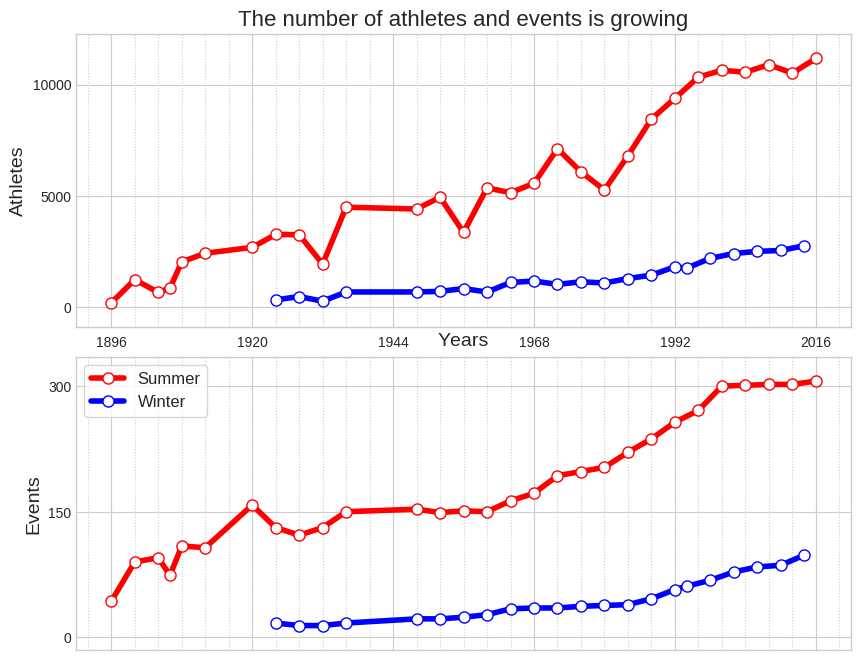

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))
axes[0].plot(dfAthlete[dfAthlete['Season']=='Summer'].groupby('Year')['ID'].nunique(),
        color='r', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='r',
        label='Summer');
axes[0].plot(dfAthlete[dfAthlete['Season']=='Winter'].groupby('Year')['ID'].nunique(),
        color='b', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='b',
        label='Winter');
axes[0].grid(True, which='minor', linestyle='dotted')
axes[0].yaxis.set_major_locator(MaxNLocator(3))
axes[0].margins(x=0.05, y=0.1)
axes[0].set_xlabel('Years', fontsize=14);
axes[0].set_ylabel('Athletes', fontsize=14);
axes[0].set_title('The number of athletes and events is growing', fontsize=16); # Common title

axes[1].plot(dfAthlete[dfAthlete['Season']=='Summer'].groupby('Year')['Event'].nunique(),
        color='r', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='r',
        label='Summer');
axes[1].plot(dfAthlete[dfAthlete['Season']=='Winter'].groupby('Year')['Event'].nunique(),
        color='b', linewidth=4,
        marker='o', markersize=8, markerfacecolor='w', markeredgecolor='b',
        label='Winter');

axes[1].xaxis.set_major_locator(MultipleLocator(24))
axes[1].xaxis.set_minor_locator(MultipleLocator(4))
axes[1].yaxis.set_major_locator(MaxNLocator(3))
axes[1].grid(True, which='minor', linestyle='dotted')
axes[1].margins(x=0.05, y=0.1)
axes[1].legend(loc='upper left', frameon=True, fontsize=12); # Common legend
axes[1].set_xlabel(''); # Hide x-label
axes[1].xaxis.tick_top(); # Move ticks to top
axes[1].tick_params(axis='x', pad=5) # Increase space to plot
axes[1].set_ylabel('Events', fontsize=14);

fig.subplots_adjust(hspace=0.1) # Reduce space between plots
plt.show();

### Style settings

We are going to add two more plots in the same style. So, we can get tired to set the same linewidth, markersize etc every time.  
If we plan to customize more parameters and use this style again, we can save `<style-name>.mplstyle` file to `mpl_configdir/stylelib` with something like
  -  lines.linewidth : 3
  -  lines.markersize : 6
  -  lines.marker : 'o'
  -  lines.markerfacecolor : 'white'

And then get your style with `plt.style.use(<style-name>)` everytime you need it.

Now we just set some common parameters with rcParams:
```python
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.marker'] = 'o'
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.markerfacecolor'] = 'white'
```

After we finished to work with this parameters, we need to return to defaults settings:
```python
plt.rcdefaults()
```

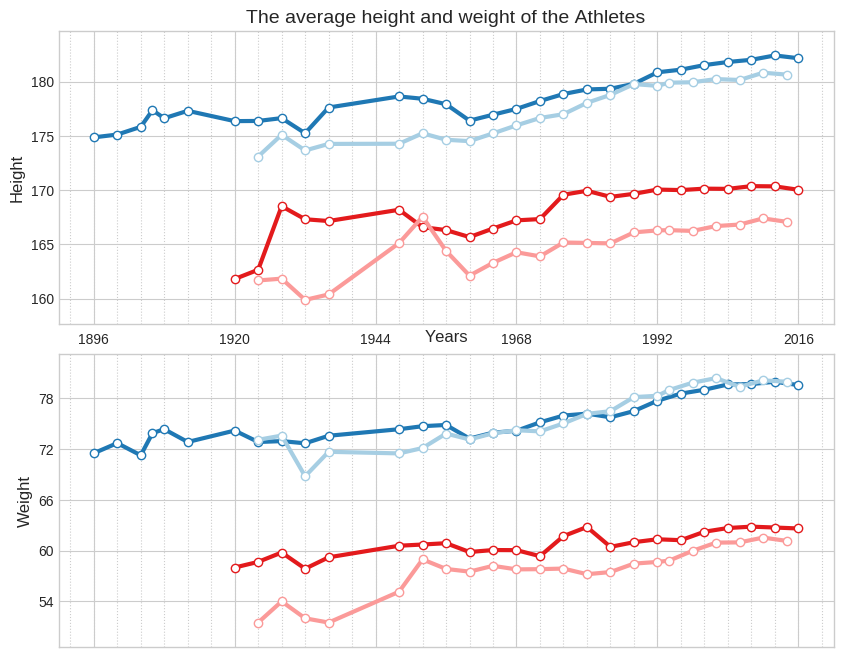

In [10]:
plt.rcdefaults()
plt.style.use('seaborn-whitegrid')

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.marker'] = 'o'
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.markerfacecolor'] = 'white'

color = sns.color_palette('Paired')

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

axes[0].plot(dfAthlete[(dfAthlete['Sex']=='F')&
                  (dfAthlete['Season']=='Summer')][['ID', 'Year', 'Height']].
        drop_duplicates().groupby('Year')['Height'].mean(),
        color=color[5], markeredgecolor=color[5],
        label='Female Summer');
axes[0].plot(dfAthlete[(dfAthlete['Sex']=='F')&
                  (dfAthlete['Season']=='Winter')][['ID', 'Year', 'Height']].
        drop_duplicates().groupby('Year')['Height'].mean(),
        color=color[4], markeredgecolor=color[4],
        label='Female Winter');
axes[0].plot(dfAthlete[(dfAthlete['Sex']=='M')&
                  (dfAthlete['Season']=='Summer')][['ID', 'Year', 'Height']].
        drop_duplicates().groupby('Year')['Height'].mean(),
        color=color[1], markeredgecolor=color[1],
        label='Male Summer');
axes[0].plot(dfAthlete[(dfAthlete['Sex']=='M')&
                  (dfAthlete['Season']=='Winter')][['ID', 'Year', 'Height']].
        drop_duplicates().groupby('Year')['Height'].mean(),
        color=color[0], markeredgecolor=color[0],
        label='Male Winter');
axes[0].yaxis.set_major_locator(MaxNLocator(6))
axes[0].grid(True, which='minor', linestyle='dotted')
axes[0].margins(x=0.05, y=0.1)
axes[0].set_xlabel('Years', fontsize=12);
axes[0].set_ylabel('Height', fontsize=12);
axes[0].set_title('The average height and weight of the Athletes', fontsize=14);

axes[1].plot(dfAthlete[(dfAthlete['Sex']=='F')&
                  (dfAthlete['Season']=='Summer')][['ID', 'Year', 'Weight']].
        drop_duplicates().groupby('Year')['Weight'].mean(),
        color=color[5], markeredgecolor=color[5],
        label='Female Summer');
axes[1].plot(dfAthlete[(dfAthlete['Sex']=='F')&
                  (dfAthlete['Season']=='Winter')][['ID', 'Year', 'Weight']].
        drop_duplicates().groupby('Year')['Weight'].mean(),
        color=color[4], markeredgecolor=color[4],
        label='Female Winter');
axes[1].plot(dfAthlete[(dfAthlete['Sex']=='M')&
                  (dfAthlete['Season']=='Summer')][['ID', 'Year', 'Weight']].
        drop_duplicates().groupby('Year')['Weight'].mean(),
        color=color[1], markeredgecolor=color[1],
        label='Male Summer');
axes[1].plot(dfAthlete[(dfAthlete['Sex']=='M')&
                  (dfAthlete['Season']=='Winter')][['ID', 'Year', 'Weight']].
        drop_duplicates().groupby('Year')['Weight'].mean(),
        color=color[0], markeredgecolor=color[0],
        label='Male Winter');

axes[1].set_ylabel('Weight', fontsize=12);
axes[1].xaxis.set_major_locator(MultipleLocator(24))
axes[1].xaxis.set_minor_locator(MultipleLocator(4))
axes[1].yaxis.set_major_locator(MaxNLocator(6))
axes[1].grid(True, which='minor', linestyle='dotted')
axes[1].margins(x=0.05, y=0.1)
axes[1].set_xlabel('');
axes[1].xaxis.tick_top();
axes[1].tick_params(axis='x', pad=5)

fig.subplots_adjust(hspace=0.1)
plt.show();

### Colormaps

How you can see in the list of available <a href="https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py" target=__blank>colormaps</a>, they are:
  -  Sequential: colormaps varying smoothly between two color tones, good to show progression from low to high values
  -  Diverging: have a median value, good when data has a significant median value
  -  Qualitative: for choosing a discrete color
  -  Other (cyclic, miscellaneous)

We used qualitative colors from colormap Paired above for Male/Female and Summer/Winter gradation.
```python
color = sns.color_palette('Paired')
ax.plot(...,color=color[5])
```  

Now let's use some diverging colormap for heatmap. Let's look at the change in the number of medals per athlete in 10 countries that have got the most medals in the last 5 games.

In [11]:
TopTen = dfAthlete[(dfAthlete['Season']=='Summer')&
          (dfAthlete['Year']>=2000)&
          (~dfAthlete['Medal'].isna())][['Year','NOC','Event','Medal']].\
drop_duplicates().groupby('NOC').size().sort_values(ascending=False).head(10).index.values
TopTen_MedalRate = []
for c in TopTen:
    for y in range(2000, 2020, 4):
        TopTen_MedalRate.append([y,c,
                                 dfAthlete[(dfAthlete['Season']=='Summer')&
                                           (dfAthlete['Year']==y)&
                                           (dfAthlete['NOC']==c)&
                                           (~dfAthlete['Medal'].isna())]
                                 [['Event', 'Medal']].drop_duplicates()['Event'].count(),
                                 dfAthlete[(dfAthlete['Season']=='Summer')&
                                           (dfAthlete['Year']==y)&
                                           (dfAthlete['NOC']==c)][['ID']].nunique().values[0]])
dfTopTen_MedalRate = pd.DataFrame(TopTen_MedalRate, columns=['Year', 'NOC', 'Medals', 'Athletes'])
dfTopTen_MedalRate['MedalsToAthlete'] = dfTopTen_MedalRate['Medals']/dfTopTen_MedalRate['Athletes']

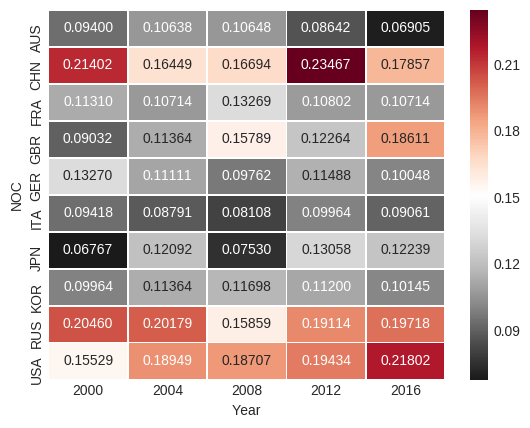

In [12]:
plt.rcdefaults()
plt.style.use('seaborn-whitegrid')
sns.heatmap(dfTopTen_MedalRate.pivot_table(columns='Year',
                                           index='NOC',
                                           values='MedalsToAthlete'),
            annot=True, fmt='.5f', linewidths=.5, cmap='RdGy_r');

We can manually set center if we know the boundary separating the losers (we will consider as losers all who doesn't hold out to 0.16 medals on the athlete). Also, we can rotate yticks labels, and increase space from it to the plot.

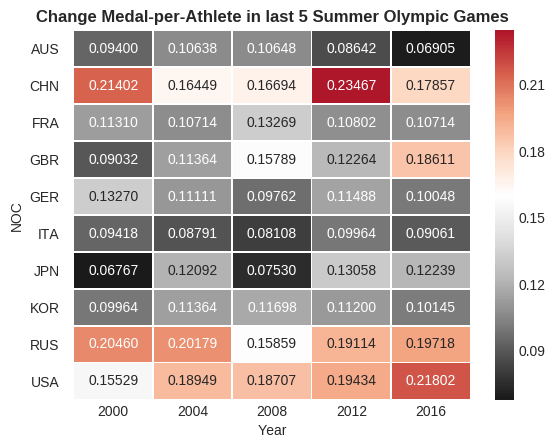

In [13]:
fig, ax = plt.subplots()
sns.heatmap(dfTopTen_MedalRate.pivot_table(columns='Year',
                                           index='NOC',
                                           values='MedalsToAthlete'),
            annot=True, fmt='.5f', linewidths=.5, cmap='RdGy_r', center=0.16, ax=ax);
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
ax.tick_params(axis='y', pad=10)
ax.set_title('Change Medal-per-Athlete in last 5 Summer Olympic Games', fontsize=12, weight='bold')
plt.show()

Usage of the miscellaneous colormap we will show on the <a href="https://docs.google.com/spreadsheets/d/19AGEhUQUol6_kNLKSzBsjcGUU3qWy3BNUg8x8IFkO3Q/edit?usp=sharing" target=__blank>rating</a> data.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.colors as clrs

dfMLO = pd.read_csv('../../data/English session 2 rating - Sheet1.csv')
dfMLO.fillna(value=0, inplace=True)
AssignColimns = dfMLO.columns.values[[True if x.find('A')==0 else False for x in dfMLO.columns.values]]
CURRENT_STEP = 9
dfPlaces = pd.DataFrame({'Place': range(1, 1+dfMLO['Overall'].drop_duplicates().shape[0])},
                        index=dfMLO['Overall'].drop_duplicates())
dfMLO = pd.merge(left=dfMLO, right=dfPlaces, left_on='Overall', right_index=True, how='left')

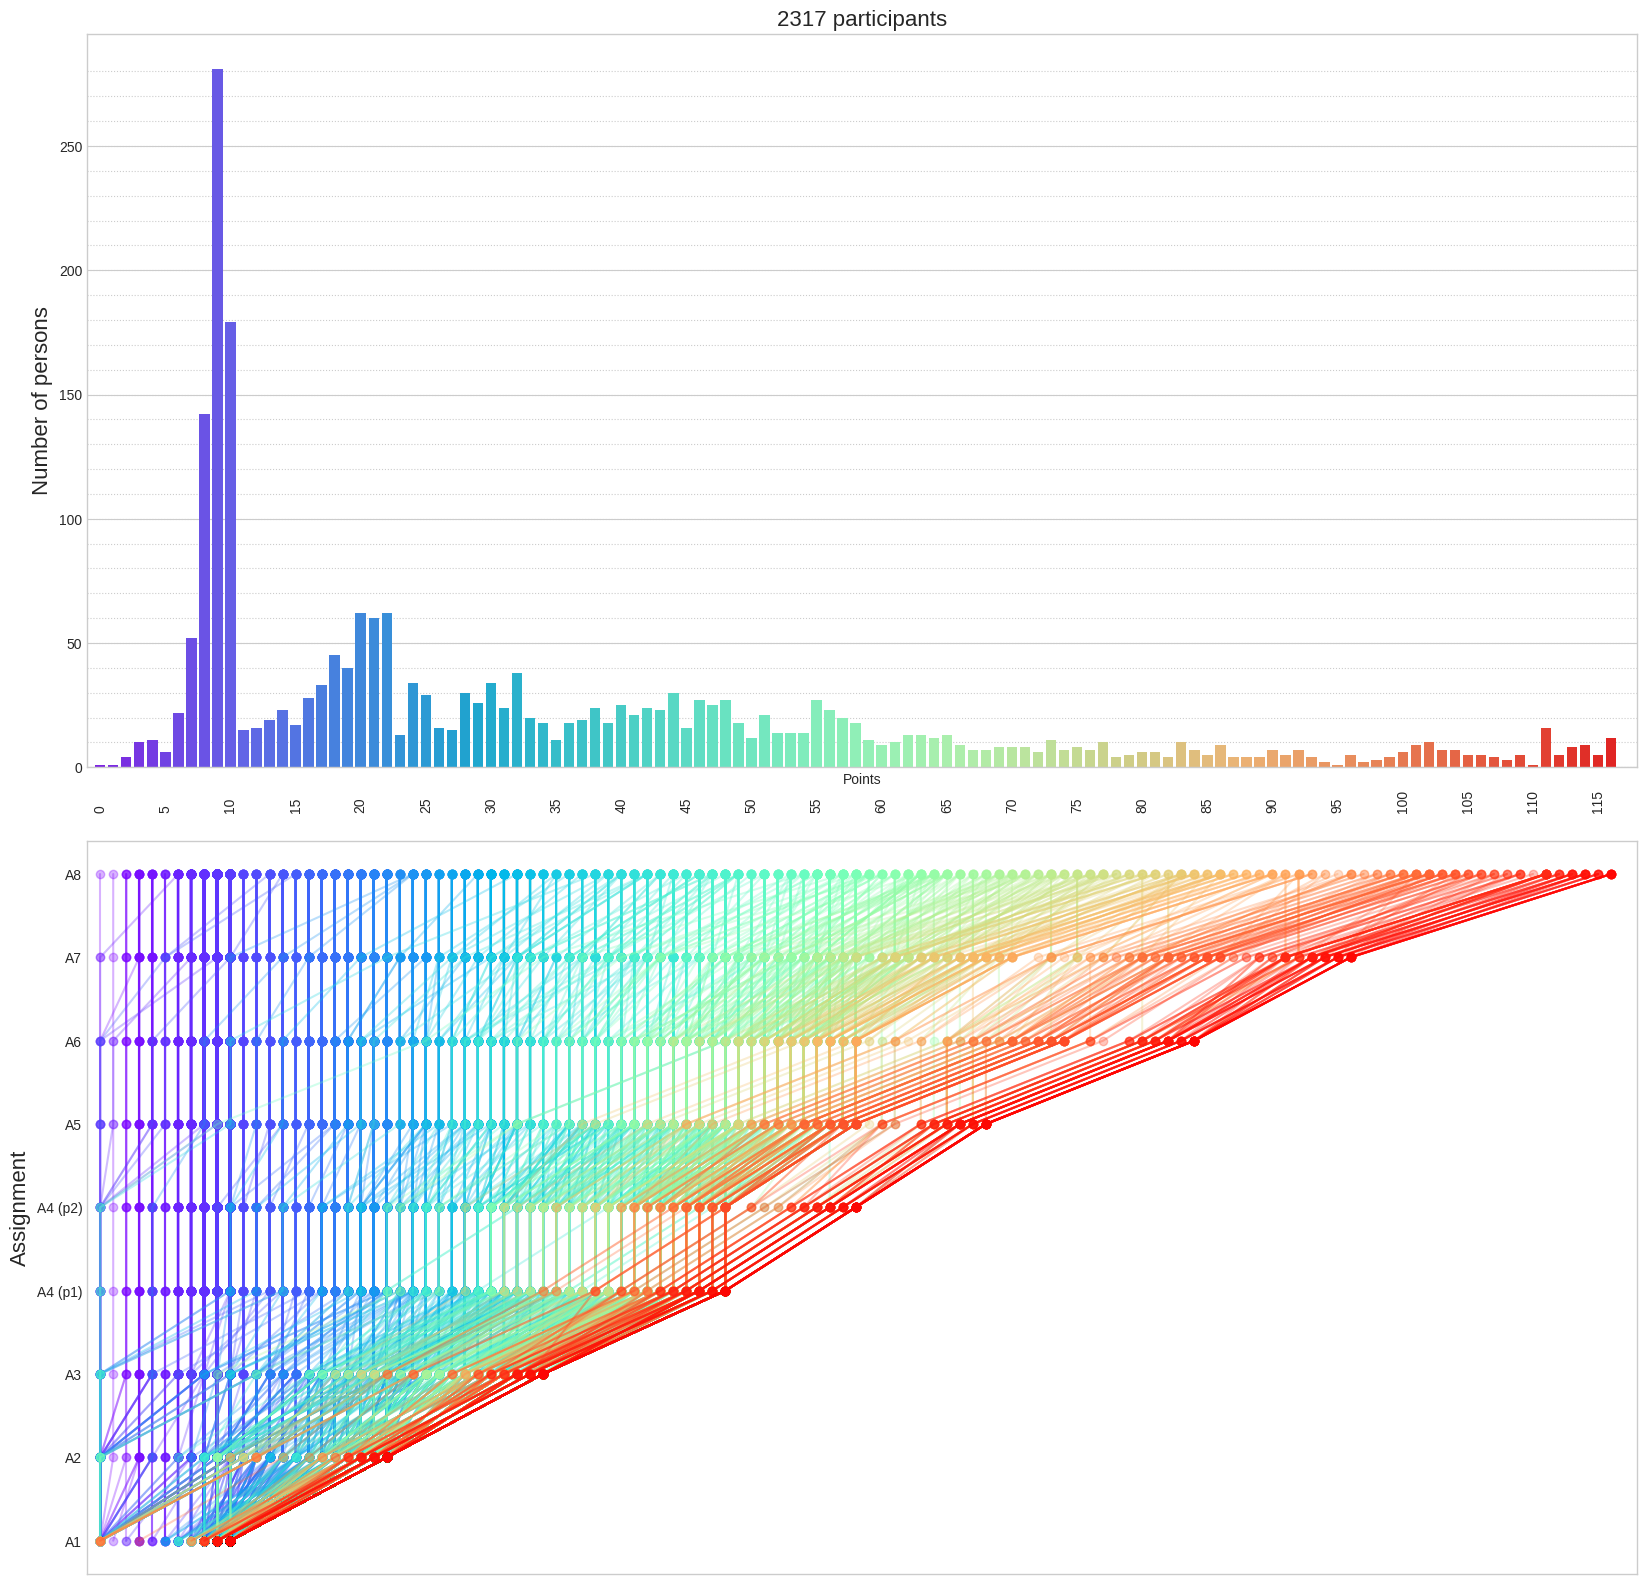

In [15]:
MaxPlace = dfMLO.iloc[-1]['Place']
MaxGroupMembers = dfMLO.groupby('Overall').size().max()
plt.rcParams['figure.figsize'] = (20, 20)

cmap = plt.cm.rainbow
cl_norm = clrs.Normalize(vmin=1, vmax=MaxPlace)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

sns.countplot(x='Overall', data=dfMLO, palette='rainbow', ax=ax1);
ax1.set_title(str(dfMLO.shape[0])+' participants', fontsize=16);
ax1.set_xlabel('Points');
ax1.set_xlim([dfMLO.iloc[-1]['Overall']-1, dfMLO.iloc[0]['Overall']+2]);
ax1.set_yticks(np.arange(0, ((MaxGroupMembers // 50)+1)*50, 50));
ax1.set_yticks(np.arange(0, ((MaxGroupMembers // 10)+1)*10, 10), minor=True);
ax1.grid(axis='y', which='minor', linestyle='dotted');
ax1.set_ylabel('Number of persons', fontsize=16);

for i in range(dfMLO.shape[0]-1, 0, -1):
    ax2.plot(dfMLO.iloc[i][AssignColimns[:CURRENT_STEP]].cumsum().values,
             range(1,len(AssignColimns[:CURRENT_STEP])+1),
             color=cmap(cl_norm(MaxPlace-dfMLO.iloc[i]['Place'])),
             marker='o', linestyle='-', alpha=0.3);

ax2.set_yticks(ticks=range(1,len(AssignColimns[:CURRENT_STEP])+1));
ax2.set_yticklabels(labels=AssignColimns[:CURRENT_STEP]);
ax2.set_ylabel('Assignment', fontsize=16);
ax2.xaxis.tick_top();
ax2.set_xlim([dfMLO.iloc[-1]['Overall']-1, dfMLO.iloc[0]['Overall']+2]);
ax2.set_xticks(np.arange(0, ((dfMLO.iloc[0]['Overall'] // 5)+1)*5, 5));
ax2.set_xticklabels(range(0, ((dfMLO.iloc[0]['Overall'] // 5)+1)*5, 5),rotation='vertical');
ax2.tick_params(axis='x', pad=20);
ax2.grid(None);

plt.subplots_adjust(hspace = 0.1)
plt.show();

Colormap here is sets by place in current rating and shows the "way" of participant in all previous assignment:
```python
import matplotlib.colors as clrs
cmap = plt.cm.rainbow
cl_norm = clrs.Normalize(vmin=1, vmax=MaxPlace)
ax.plot(..., color=cmap(cl_norm(...))
```

### Conclusion

We very briefly reviewed:
  -  Figures, Axes, Subplots
  -  Ticks, Tickers (locators), Tick labels, grid
  -  Styles, set common parameters in rcParams
  -  Colormaps

In preparation for this tutorial, I did not met the limits of the capabilities of Matplotlib. To find them, we need more experience. Good luck with that!

### Refereces

  1.  <a href="https://matplotlib.org/users/index.html" target=__blank>User's Guide</a>
  2.  <a href="https://matplotlib.org/tutorials/index.html" target=__blank>Tutorials</a>
  3.  <a href="https://matplotlib.org/gallery/index.html" target=__blank>Gallery</a>
  4.  https://github.com/matplotlib/AnatomyOfMatplotlib

### Appendix I

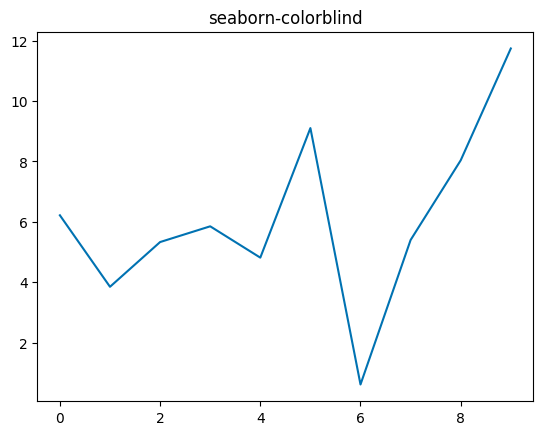

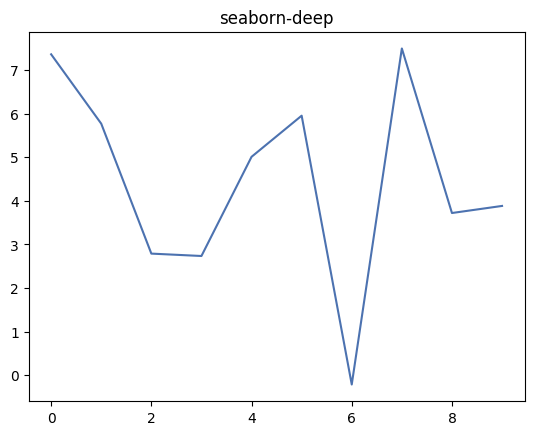

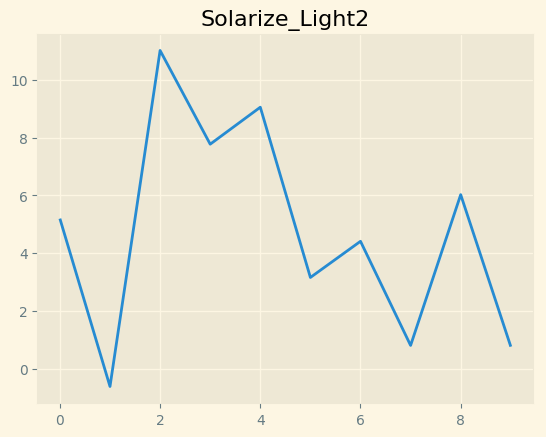

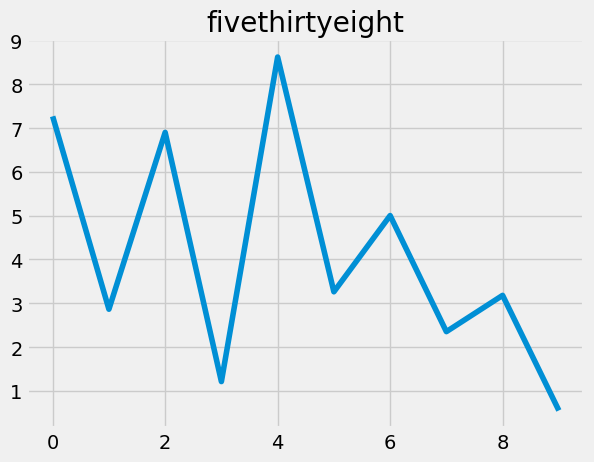

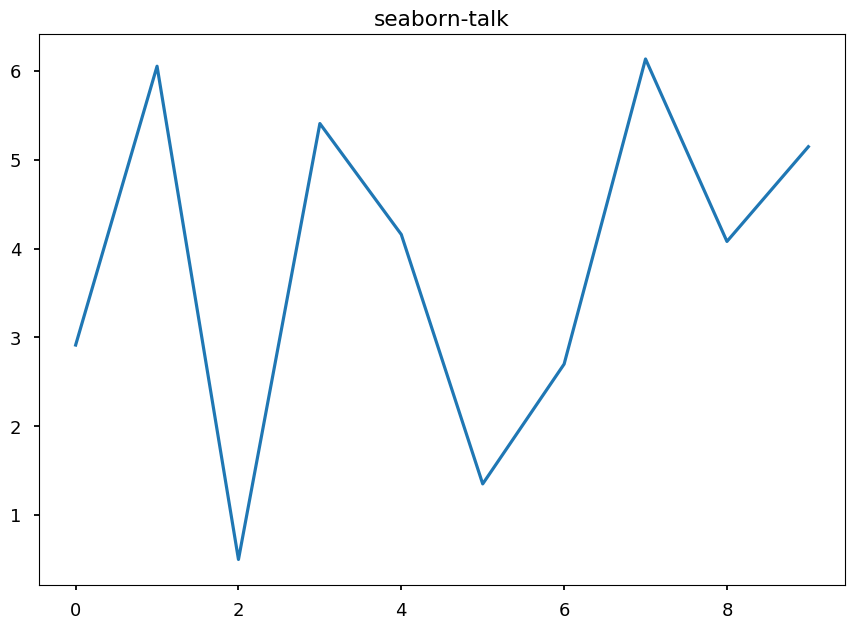

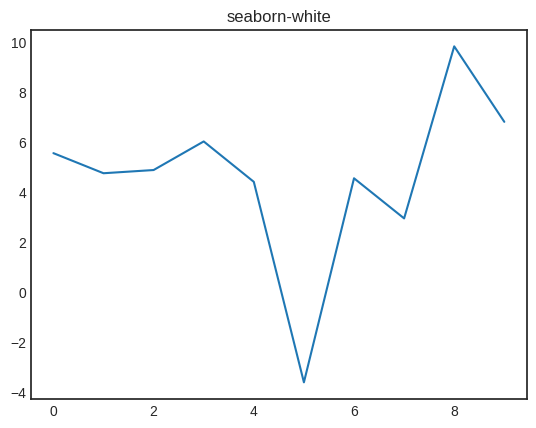

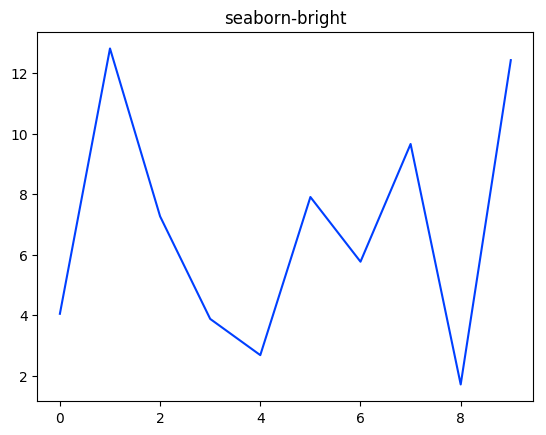

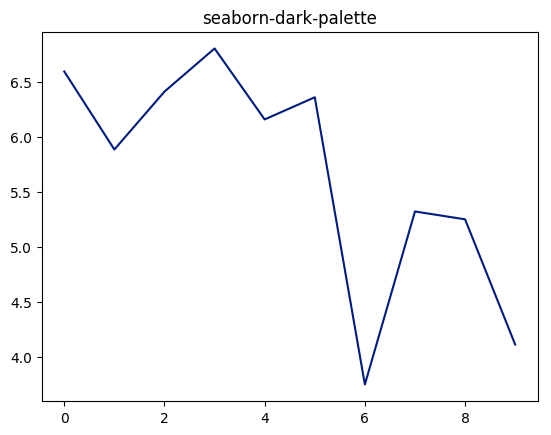

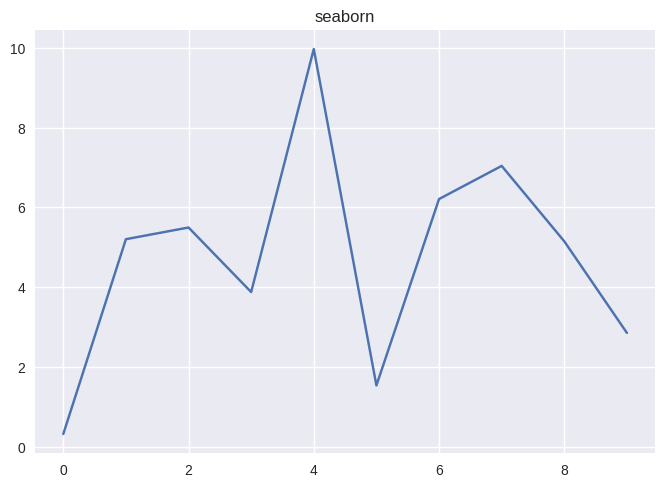

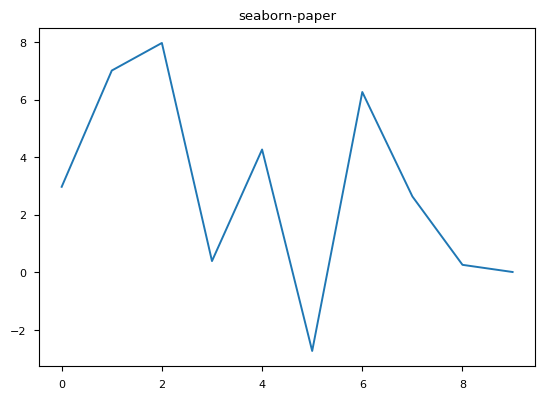

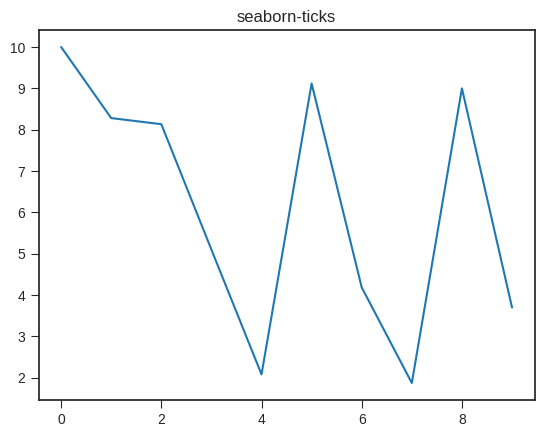

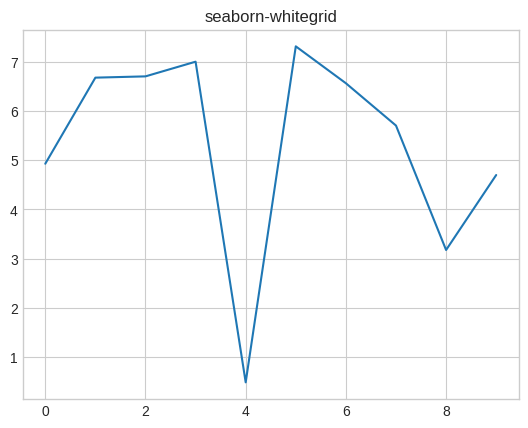

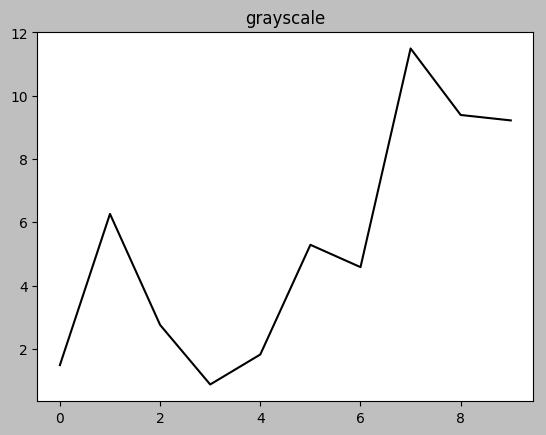

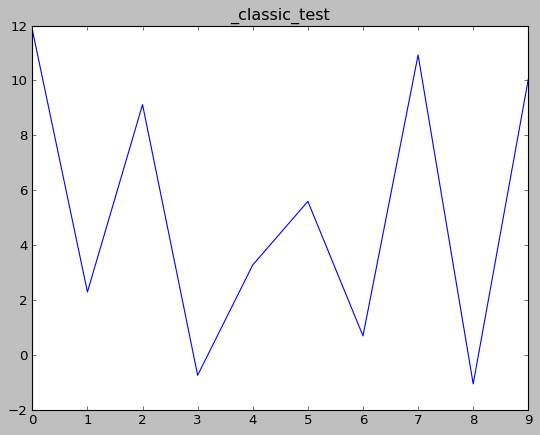

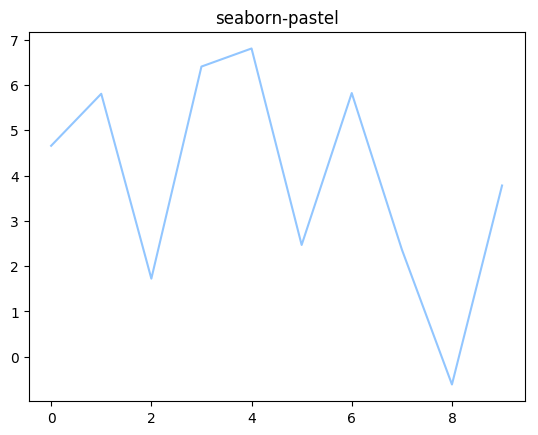

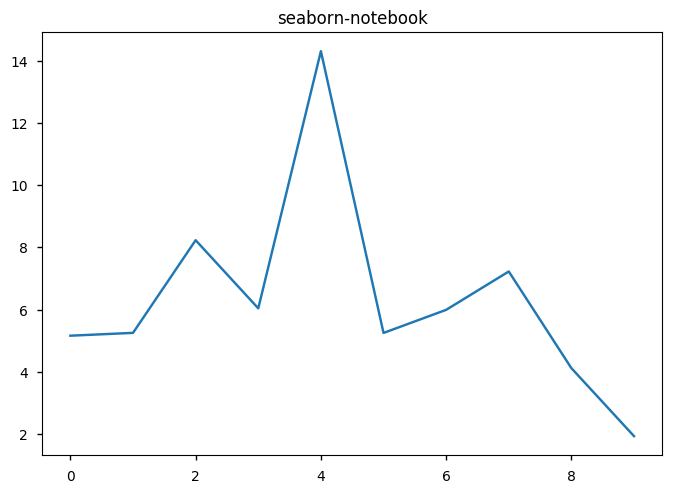

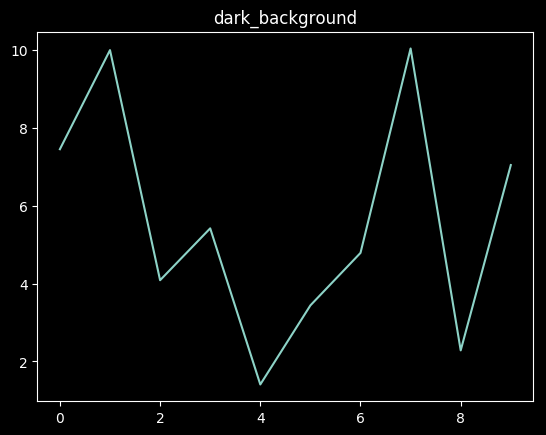

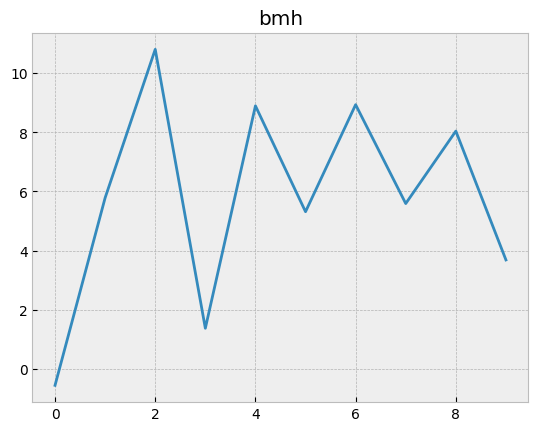

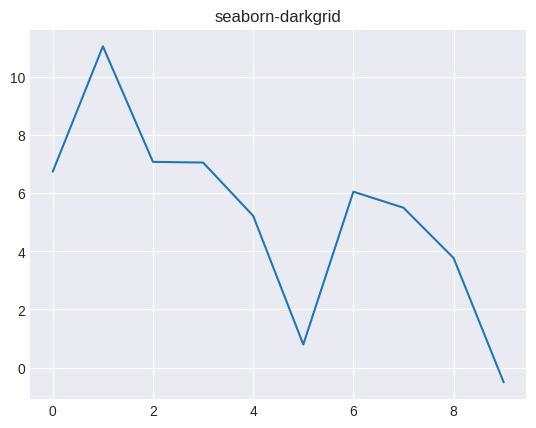

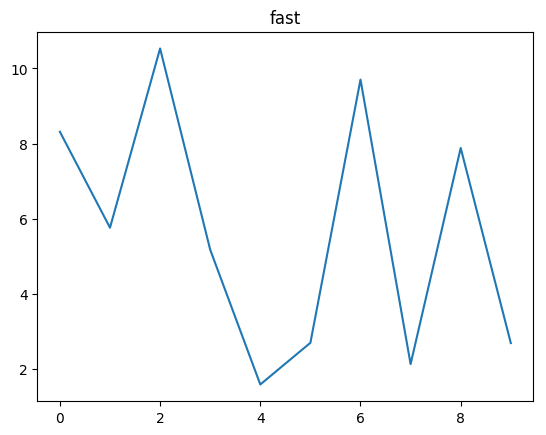

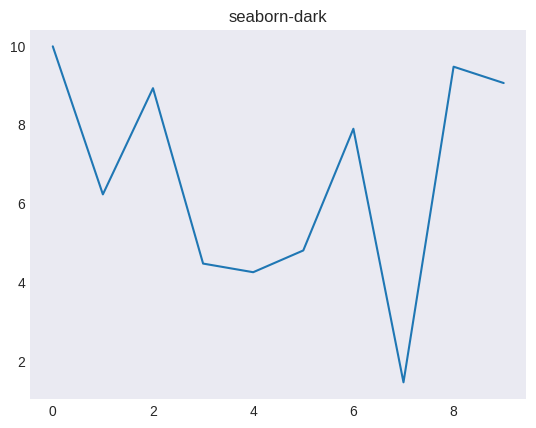

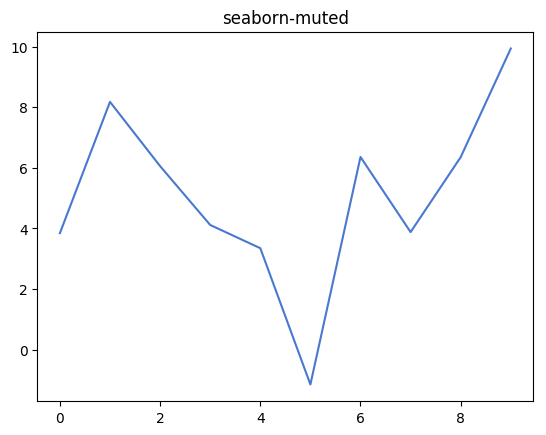

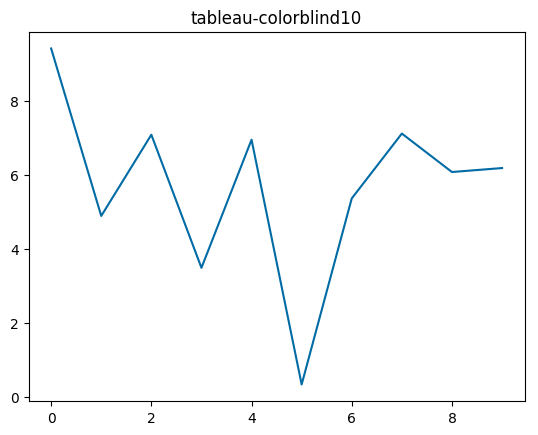

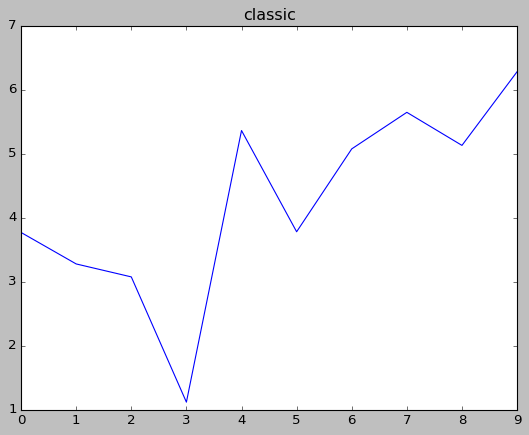

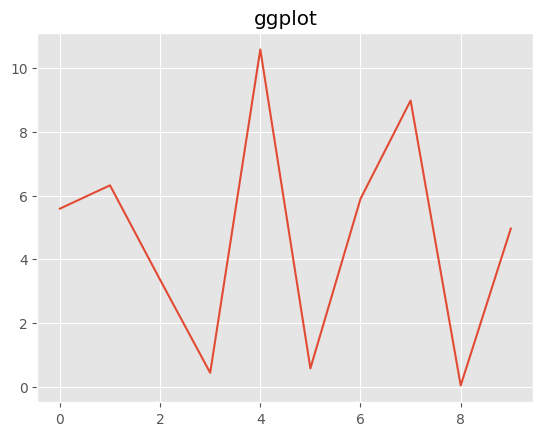

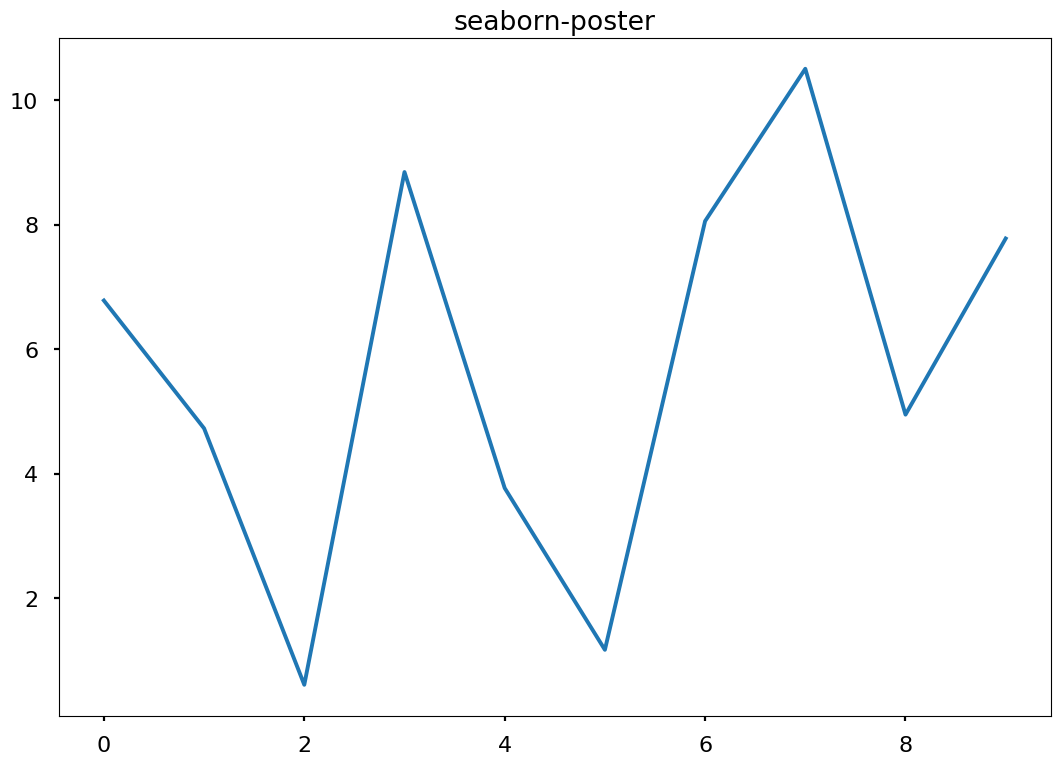

In [16]:
for st in plt.style.available:
    plt.rcdefaults()
    plt.style.use(st)
    plt.plot(range(10), np.random.normal(5, 3, 10));
    plt.title(st)
    plt.show();